In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("advertising.csv")

# EDA

In [3]:
df.shape

(200, 4)

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [8]:
abs(df.corr()["Sales"]).sort_values(ascending=False)

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

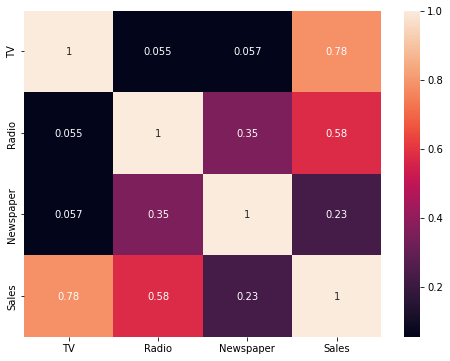

In [10]:
ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)

# Regression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
def predict(x,y, plot=False, return_value=False):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    L = LinearRegression()
    Lmodel = L.fit(x_train, y_train)
    y_pred_L = Lmodel.predict(x_test)
    mse = (mean_squared_error(y_test, y_pred_L)) ** 0.5
    r2=r2_score(y_test, y_pred_L)
    if(plot):
        plt.scatter(x_test, y_test)
        plt.scatter(x_test, y_pred_L)
    print("mean squared error:", mse, " r2_score:",r2)
    
    if(return_value):
        return y_test, y_pred_L
    

## As you can see from below, if we only advertise from one place, our success drops.

mean squared error: 3.194472431998898  r2_score: 0.6766954295627076


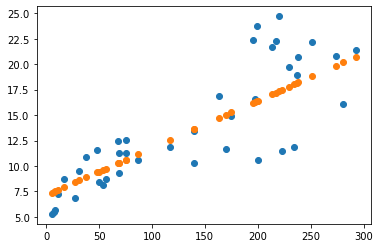

In [13]:
predict(df[["TV"]], df[["Sales"]], True)

mean squared error: 4.8216974799471926  r2_score: 0.2634309396999791


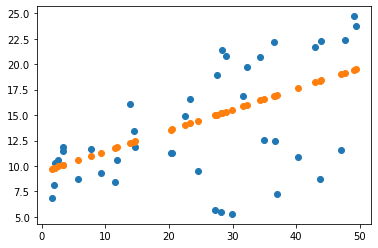

In [14]:
predict(df[["Radio"]], df[["Sales"]], True)

mean squared error: 5.533600454969853  r2_score: 0.029871749149522397


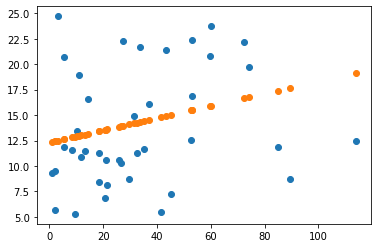

In [15]:
predict(df[["Newspaper"]], df[["Sales"]], True)

## So we need to combine them together

In [16]:
x = df[["TV","Radio","Newspaper"]]
y = df[["Sales"]]
x.shape, y.shape

((200, 3), (200, 1))

In [17]:
y_test, y_pred = predict(x,y, plot=False, return_value=True)

mean squared error: 1.78159966153345  r2_score: 0.899438024100912


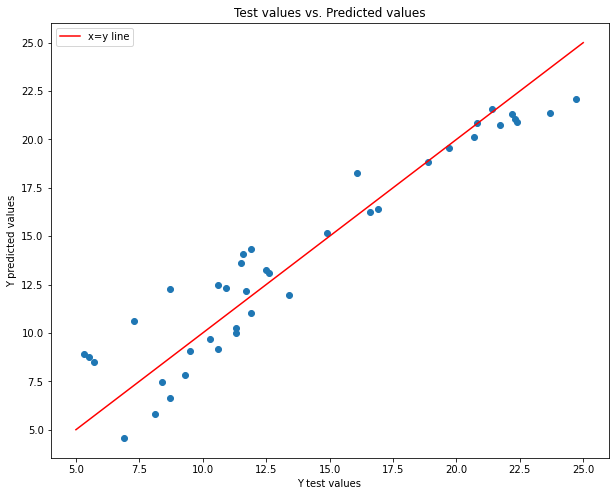

In [18]:
plt.figure(figsize=(10,8))
plt.plot(range(5,26),range(5,26), label="x=y line", color="r")
plt.scatter(y_test, y_pred)
plt.title("Test values vs. Predicted values")
plt.xlabel("Y test values");
plt.ylabel("Y predicted values");
plt.legend()